In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
dataset=pd.read_csv("Liver Patient Dataset (LPD)_train.csv",encoding= 'unicode_escape')

In [145]:
dataset.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [146]:
dataset.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [147]:
dataset.shape

(30691, 11)

In [148]:
dataset.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

#Data Cleaning

Checking Duplicate tuples, if any will be removed

In [149]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30686    False
30687     True
30688    False
30689    False
30690     True
Length: 30691, dtype: bool

In [150]:
dataset.duplicated().sum()

11323

In [151]:
dataset = dataset.drop_duplicates()
print( dataset.shape )

(19368, 11)


#checking Missing Values

In [152]:
dataset.isna().sum()

Age of the patient                        1
Gender of the patient                   796
Total Bilirubin                         557
Direct Bilirubin                        490
 Alkphos Alkaline Phosphotase           694
 Sgpt Alamine Aminotransferase          459
Sgot Aspartate Aminotransferase         393
Total Protiens                          370
 ALB Albumin                            413
A/G Ratio Albumin and Globulin Ratio    436
Result                                    0
dtype: int64

<AxesSubplot:xlabel='A/G Ratio Albumin and Globulin Ratio'>

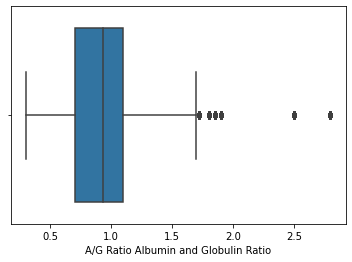

In [153]:
sns.boxplot(data = dataset, x= 'A/G Ratio Albumin and Globulin Ratio' )

Q1 = 0.700 

Q3 = 1.1000

IQR = 0.4

1.5 * 0.4 = 0.6

Q1 - 0.6 = 0.1

Q3 + 0.6 = 1.7

Anything away between 0.1 and 1.7 is considered to be an Outlier





In [154]:
dataset['A/G Ratio Albumin and Globulin Ratio'].mode()

0    1.0
dtype: float64

In [155]:
dataset['A/G Ratio Albumin and Globulin Ratio'].median()

0.93

In [156]:
dataset['A/G Ratio Albumin and Globulin Ratio'].mean()

0.9458879146418744

In [157]:
dataset['A/G Ratio Albumin and Globulin Ratio'] = dataset['A/G Ratio Albumin and Globulin Ratio'].fillna(dataset['A/G Ratio Albumin and Globulin Ratio'].median())

In [158]:
dataset.isna().sum()

Age of the patient                        1
Gender of the patient                   796
Total Bilirubin                         557
Direct Bilirubin                        490
 Alkphos Alkaline Phosphotase           694
 Sgpt Alamine Aminotransferase          459
Sgot Aspartate Aminotransferase         393
Total Protiens                          370
 ALB Albumin                            413
A/G Ratio Albumin and Globulin Ratio      0
Result                                    0
dtype: int64

#Male Vs Female

<AxesSubplot:xlabel='Gender of the patient', ylabel='count'>

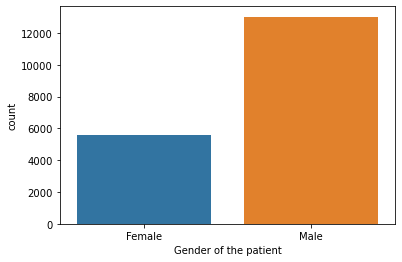

In [159]:
import seaborn as sns
sns.countplot(data = dataset, x='Gender of the patient', label='count')

In [160]:
Male, Female = dataset['Gender of the patient'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female: ',Female)


Number of patients that are male:  13019
Number of patients that are female:  5553


#Encoding the Gender Column

Label Male as 1 and Female as 0

In [161]:
def partition(x):
    if x == 'Male':
        return 1
    return 0

dataset['Gender of the patient'] = dataset['Gender of the patient'].map(partition)

In [162]:
dataset

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
29974,58.0,1,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
29976,28.0,1,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1
30686,50.0,1,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30688,54.0,1,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1


#Converting Output Column 'Dataset' to 0's and 1's

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [163]:
def partition(x):
    if x == 2:
        return 0
    return 1

dataset['Result'] = dataset['Result'].map(partition)

In [164]:
dataset['Result']

0        1
1        1
2        1
3        1
4        1
        ..
29974    1
29976    1
30686    1
30688    1
30689    1
Name: Result, Length: 19368, dtype: int64

#Correlation Matrix

<AxesSubplot:>

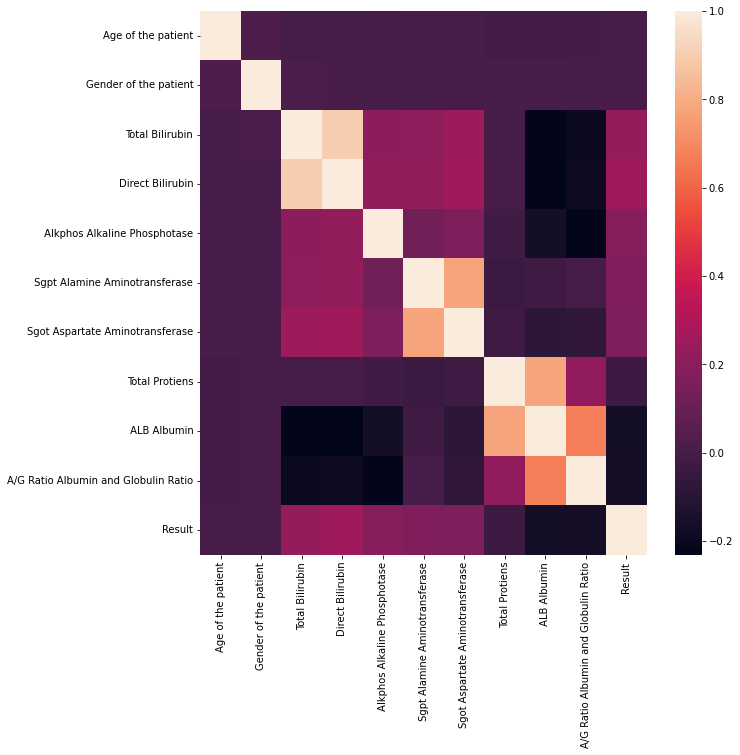

In [165]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

In [166]:
dataset.dropna(inplace=True)


In [167]:
# Convert categorical variables to numerical using label encoding
le = LabelEncoder()
data['Gender of the patient'] = le.fit_transform(data['Gender of the patient'])
data['Result'] = le.fit_transform(data['Result'])

In [168]:
# Scale the training and testing sets separately
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# logistic regression

In [169]:

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Reading the data
data=pd.read_csv(r"Liver Patient Dataset (LPD)_train.csv",encoding= 'unicode_escape')
data.head()

# Preprocessing the data
data = data.dropna()
data['Gender of the patient'] = data['Gender of the patient'].map({'Male': 1, 'Female': 0})

# Splitting the data into training and testing sets
X = data.drop('Result', axis=1)
y = data['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predicting the test set results
y_pred = lr.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Outputting the results
# Print the performance metrics
print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 score:', f1*100)
print('ROC AUC score:', roc_auc*100)

Accuracy: 71.92562592047128
Precision: 73.85017071701144
Recall: 94.28205128205128
F1 score: 82.82464241468634
ROC AUC score: 99.76608187134504


C:\Users\SARAFATHALI.K\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# random forest

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
data=pd.read_csv(r"Liver Patient Dataset (LPD)_train.csv",encoding= 'unicode_escape')
data.head()
# Preprocessing: Replace missing values with median
data.fillna(data.median(), inplace=True)
from sklearn.preprocessing import OneHotEncoder
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Result', axis=1), 
                                                    data['Result'], test_size=0.2, random_state=42)
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
onehot = OneHotEncoder()

# Encode the categorical variables in the training and testing data
X_train_encoded = onehot.fit_transform(X_train)
X_test_encoded = onehot.transform(X_test)

# Fit the model on the training data
rf_clf.fit(X_train_encoded, y_train)

# Predict on the testing data
y_pred = rf_clf.predict(X_test_encoded)
#Evaluate the model using various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


# Print the performance metrics
print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 score:', f1*100)
print('ROC AUC score:', roc_auc*100)

C:\Users\SARAFA~1.K\AppData\Local\Temp/ipykernel_24192/1238179708.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


Accuracy: 99.86968561654993
Precision: 99.81969799414018
Recall: 100.0
F1 score: 99.90976765170313
ROC AUC score: 99.76608187134504


# support vector machine

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
data = pd.read_csv(r"Liver Patient Dataset (LPD)_train.csv", encoding='unicode_escape')

# Preprocessing: Replace missing values with median
data.fillna(data.median(), inplace=True)

# Preprocessing: Encode categorical variables
label_encoder = LabelEncoder()
data['Gender of the patient'] = label_encoder.fit_transform(data['Gender of the patient'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Result', axis=1), data['Result'], test_size=0.2, random_state=42)

# Preprocessing: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm_clf = SVC(kernel='linear', C=1, random_state=42)

# Fit the model on the training data
svm_clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_clf.predict(X_test)

# Evaluate the model using various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the performance metrics
print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 score:', f1*100)
print('ROC AUC score:', roc_auc*100)

C:\Users\SARAFA~1.K\AppData\Local\Temp/ipykernel_24192/763164910.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


Accuracy: 72.14530053754683
Precision: 72.14530053754683
Recall: 100.0
F1 score: 83.81907645722937
ROC AUC score: 50.0


#saving the models

# KNN

In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
data = pd.read_csv(r"Liver Patient Dataset (LPD)_train.csv", encoding='unicode_escape')

# Preprocessing: Replace missing values with median
data.fillna(data.median(), inplace=True)

# Preprocessing: Encode categorical variables
label_encoder = LabelEncoder()
data['Gender of the patient'] = label_encoder.fit_transform(data['Gender of the patient'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Result', axis=1), data['Result'], test_size=0.2, random_state=42)

# Preprocessing: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn_clf.predict(X_test)

# Evaluate the model using various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the performance metrics
print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 score:', f1*100)
print('ROC AUC score:', roc_auc*100)


C:\Users\SARAFA~1.K\AppData\Local\Temp/ipykernel_24192/43746374.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


Accuracy: 91.57843296953901
Precision: 94.07390716538981
Recall: 94.26507112214946
F1 score: 94.16939212811548
ROC AUC score: 89.44247708154256


In [173]:
import pickle
pickle.dump(rf_clf, open('model.pkl', 'wb'))
pickle.dump(scaler, open('sc.pkl', 'wb'))